In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [39]:
import psycopg2
import matplotlib.pyplot as plt
connection = psycopg2.connect(
            host="aliyun-medbot.rwlb.rds.aliyuncs.com",
            database="beijing3th-jingzhou-timedelay-logs",
            user="yuzt_mysql",
            password="Medbot8848",
            port="5432"  # 默认是5432，如果使用默认可以省略
        )
print (connection)

<connection object at 0x00000186FEBF64C8; dsn: 'user=yuzt_mysql password=xxx dbname=beijing3th-jingzhou-timedelay-logs host=aliyun-medbot.rwlb.rds.aliyuncs.com port=5432', closed: 0>


In [44]:
cursor = connection.cursor()
cursor.execute("SELECT version();") # 查询PostgreSQL版本
record = cursor.fetchone()
print(record)
cursor.execute("SELECT * FROM _2024_05_15_networkrecord_log ORDER BY timestamp ASC LIMIT 5;")
timeResults=cursor.fetchall()
#for time in timeResults:
#    x=time


('PostgreSQL 14.11',)
[(datetime.datetime(2024, 5, 15, 8, 16, 56, 155000, tzinfo=datetime.timezone(datetime.timedelta(seconds=28800))), Decimal('24')), (datetime.datetime(2024, 5, 15, 8, 16, 56, 309000, tzinfo=datetime.timezone(datetime.timedelta(seconds=28800))), Decimal('25')), (datetime.datetime(2024, 5, 15, 8, 16, 56, 413000, tzinfo=datetime.timezone(datetime.timedelta(seconds=28800))), Decimal('20')), (datetime.datetime(2024, 5, 15, 8, 16, 56, 511000, tzinfo=datetime.timezone(datetime.timedelta(seconds=28800))), Decimal('17')), (datetime.datetime(2024, 5, 15, 8, 16, 56, 613000, tzinfo=datetime.timezone(datetime.timedelta(seconds=28800))), Decimal('21'))]


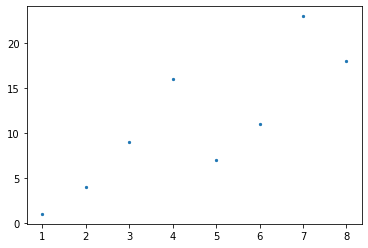

In [31]:

import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([1, 4, 9, 16, 7, 11, 23, 18])
#sizes = np.array([10,10,10,20,10,10,10,10])
sizes=5
plt.scatter(x, y, s=sizes)
plt.show()

In [3]:
from datetime import datetime
dt=datetime(2024, 5, 15, 8, 16, 56,155000)
formatted = dt.strftime('%Y-%m-%d %H:%M:%S')+".{:03d}".format(t.microsecond // 1000)
print(formatted)

NameError: name 't' is not defined